In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("data/student_admission_dataset.csv")
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


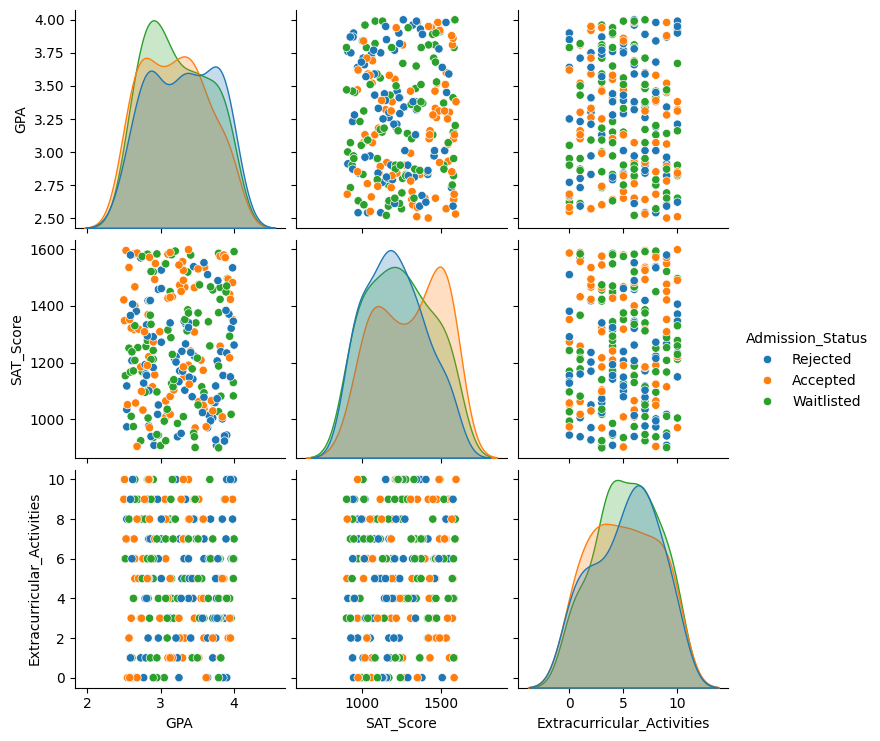

In [99]:
sns.pairplot(df, hue='Admission_Status')
plt.show()

In [100]:
X = df.drop('Admission_Status', axis=1)
y = df['Admission_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

Accuracy: 0.34


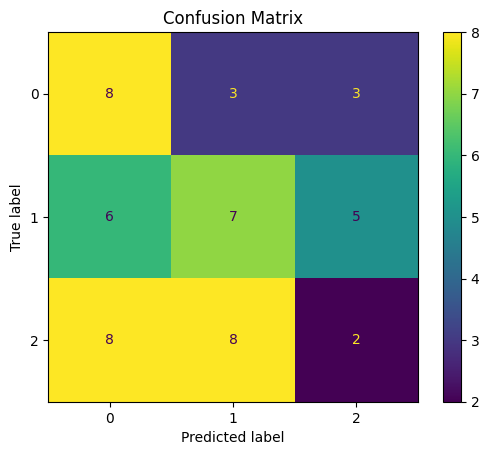

In [102]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


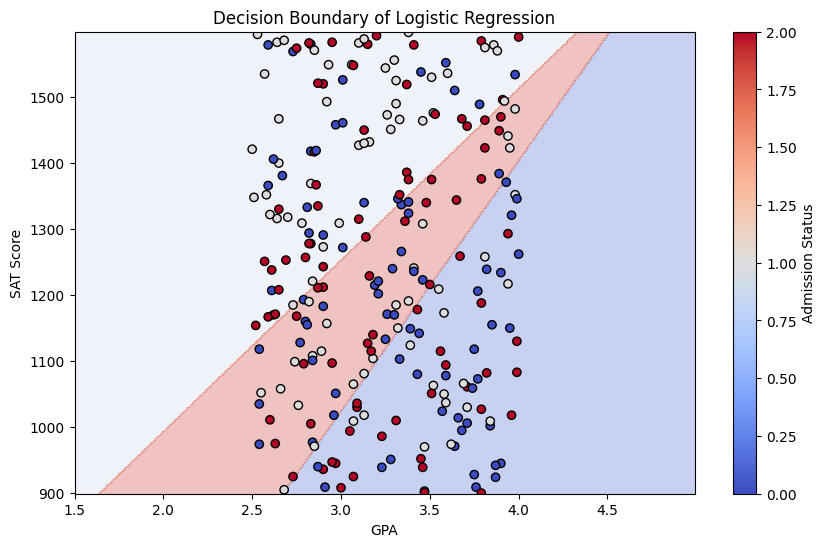

In [107]:
df['Admission_Status'] = df['Admission_Status'].map({'Rejected': 0, 'Accepted': 1, 'Waitlisted': 2})

X = df[['GPA', 'SAT_Score']].values
y = df['Admission_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('GPA')
plt.ylabel('SAT Score')
plt.title('Decision Boundary of Logistic Regression')
plt.colorbar(label='Admission Status')
plt.show()